In [209]:
from toolds import *

In [210]:
import warnings
warnings.simplefilter('ignore')

### ------------------------ Extract Stats by Stats ------------------------

In [211]:
Stats = ['scoring', 'rebounds', 'field-goals','free-throws', 'assists' , 'steals' , 'blocks' , 'fouls' ,'double-doubles']

In [212]:
for el in Stats:
    if(not os.path.exists("{}.csv".format(el))):
        print('Download Data for {}'.format(el))
        df = get_data(el)
        df = df[df.Player_Name != 'PLAYER']
        df.Player_ID = df.Player_ID.apply(lambda x: str(x).split('id/')[1].split('/')[0])
        df.to_csv('{}.csv'.format(el))
    else: 
        print('{} Already Download'.format(el))

scoring Already Download
rebounds Already Download
field-goals Already Download
free-throws Already Download
assists Already Download
steals Already Download
blocks Already Download
fouls Already Download
double-doubles Already Download


Then we have all data in CSV files, now we chose witch feature to keep and then merge all the data

### ------------------------ Merge All ------------------------

In [213]:
Scoring = pd.read_csv('scoring.csv')
Scoring.drop('Unnamed: 0', axis = 1, inplace = True)

In [214]:
Scoring.head()

,Games_Played,Player_ID,Player_Name,Team,Year,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%
0,82,110,"Kobe Bryant, SF",LAL,2003,41.5,2461,868-1924,0.451,124-324,0.383,601-713,0.843
1,75,532,"Tracy McGrady, SG",ORL,2003,39.4,2407,829-1813,0.457,173-448,0.386,576-726,0.793
2,82,366,"Allen Iverson, SG",PHI,2003,42.5,2262,804-1940,0.414,84-303,0.277,570-736,0.774
3,79,662,"Paul Pierce, SF",BOS,2003,39.2,2048,663-1592,0.416,118-391,0.302,604-753,0.802
4,80,609,"Dirk Nowitzki, C",DAL,2003,39.0,2011,690-1489,0.463,148-390,0.379,483-548,0.881


In [215]:
Rebounds = pd.read_csv('rebounds.csv')
Rebounds.drop(['Unnamed: 0', 'MPG', 'DRPG', 'RPG', 'RP48', 'ORPG', 'REB'], axis = 1, inplace = True)

In [216]:
Rebounds.head()

,Games_Played,Player_ID,Player_Name,Team,Year,OFF,DEF
0,73,885,"Ben Wallace, PF",DET,2003,293,833
1,82,261,"Kevin Garnett, PF",MIN,2003,244,858
2,81,215,"Tim Duncan, C",SA,2003,259,784
3,62,91,"Elton Brand, PF",LAC,2003,283,420
4,67,614,"Shaquille O'Neal, C",LAL,2003,259,483


In [217]:
Field_Goals = pd.read_csv('field-goals.csv')
Field_Goals.drop(['Unnamed: 0', 'PPG', 'FGM', 'FGA', 'FGM_', 'FG%','FGA_', 'FG%_', '2PA'], axis = 1, inplace = True)

In [218]:
Field_Goals.head()

,Games_Played,Player_ID,Player_Name,Team,Year,2PM,2P%,PPS
0,1,1779,"Chris Owens, F",MEM,2003,2,0.667,1.33
1,5,164,"Chris Crawford, SF",ATL,2003,7,0.700,1.85
2,16,44,"Maceo Baston, SF",TOR,2003,15,0.600,1.60
3,81,990,"Eddy Curry, C",CHI,2003,335,0.585,1.48
4,67,614,"Shaquille O'Neal, C",LAL,2003,695,0.574,1.52


In [219]:
Assist = pd.read_csv('assists.csv')
Assist.drop(['Unnamed: 0', 'AP48M', 'MPG', 'APG', 'TOPG', 'AST/TO'], axis = 1, inplace = True)

In [220]:
Assist.head()

,Games_Played,Player_ID,Player_Name,Team,Year,AST,TO
0,80,429,"Jason Kidd, PG",NJ,2003,711,296
1,76,933,"Jason Williams, PG",MEM,2003,631,168
2,80,640,"Gary Payton, PG",MIL/SEA,2003,663,187
3,81,509,"Stephon Marbury, PG",PHX,2003,654,263
4,82,812,"John Stockton, G",UTAH,2003,629,182


In [221]:
Steals = pd.read_csv('steals.csv')
Steals.drop(['Unnamed: 0','MPG' ,'TO', 'STPG', 'STP48M', 'TOPG', 'ST/TO', 'ST/PF'], axis = 1, inplace = True)
Steals.head()

,Games_Played,Player_ID,Player_Name,Team,Year,STL,PF
0,82,366,"Allen Iverson, SG",PHI,2003,225,149
1,69,25,"Metta World Peace, SF",IND,2003,159,242
2,81,510,"Shawn Marion, SG",PHX,2003,185,208
3,80,147,"Doug Christie, SG",SAC,2003,180,186
4,80,429,"Jason Kidd, PG",NJ,2003,179,127


In [222]:
Blocks = pd.read_csv('blocks.csv')
Blocks.drop(['Unnamed: 0', 'MPG', 'PF', 'BLKPG', 'BLKP48M', 'BLK/PF'], axis = 1, inplace = True)
Blocks.head()

,Games_Played,Player_ID,Player_Name,Team,Year,BLK
0,81,687,"Theo Ratliff, C",ATL,2003,262
1,73,885,"Ben Wallace, PF",DET,2003,230
2,81,215,"Tim Duncan, C",SA,2003,237
3,62,91,"Elton Brand, PF",LAC,2003,158
4,82,254,"Adonal Foyle, C",GS,2003,205


In [223]:
Fouls = pd.read_csv('fouls.csv')
Fouls.drop(['Unnamed: 0', 'MPG', 'PF', 'PFPG', 'PFP48M'], axis = 1, inplace = True)
Fouls.head()

,Games_Played,Player_ID,Player_Name,Team,Year,FLAG,TECH,EJECT
0,81,846,"Kurt Thomas, PF",NY,2003,1,8,0
1,1,697,"Don Reid, F",DET,2003,0,0,0
2,69,454,"Raef LaFrentz, C",DAL,2003,1,1,0
3,77,515,"Kenyon Martin, PF",NJ,2003,2,13,0
4,49,617,"Lamar Odom, PF",LAC,2003,0,5,0


In [224]:
Double = pd.read_csv('double-doubles.csv')
Double.drop(['Unnamed: 0', 'MPG', 'APG', 'STPG', 'BLKPG', 'PPG', 'RPG'], axis = 1, inplace = True)
Double.head()

,Games_Played,Player_ID,Player_Name,Team,Year,DBLDBL,TRIDBL
0,82,261,"Kevin Garnett, PF",MIN,2003,68,6
1,81,215,"Tim Duncan, C",SA,2003,58,1
2,67,614,"Shaquille O'Neal, C",LAL,2003,46,0
3,67,897,"Chris Webber, C",SAC,2003,45,3
4,62,91,"Elton Brand, PF",LAC,2003,44,1


In [225]:
dfs = [Scoring, Rebounds, Field_Goals, Assist, Steals, Blocks, Fouls, Double]

In [226]:
df_final = reduce(lambda left,right: pd.merge(left,right,how = 'outer',on=['Games_Played', 'Player_Name','Year', 'Player_ID', 'Team']), dfs)

In [227]:
df_final.columns

Index(['Games_Played', 'Player_ID', 'Player_Name', 'Team', 'Year', 'MPG',
       'PTS', 'FGM-FGA', 'FG%', '3PM-3PA', '3P%', 'FTM-FTA', 'FT%', 'OFF',
       'DEF', '2PM', '2P%', 'PPS', 'AST', 'TO', 'STL', 'PF', 'BLK', 'FLAG',
       'TECH', 'EJECT', 'DBLDBL', 'TRIDBL'],
      dtype='object')

In [228]:
df_final.head()

,Games_Played,Player_ID,Player_Name,Team,Year,MPG,PTS,FGM-FGA,FG%,3PM-3PA,...,AST,TO,STL,PF,BLK,FLAG,TECH,EJECT,DBLDBL,TRIDBL
0,82,110,"Kobe Bryant, SF",LAL,2003,41.5,2461.0,868-1924,0.451,124-324,...,481.0,288.0,181.0,218.0,67.0,0.0,11.0,0.0,23.0,5.0
1,75,532,"Tracy McGrady, SG",ORL,2003,39.4,2407.0,829-1813,0.457,173-448,...,411.0,195.0,124.0,156.0,59.0,0.0,6.0,0.0,19.0,1.0
2,82,366,"Allen Iverson, SG",PHI,2003,42.5,2262.0,804-1940,0.414,84-303,...,454.0,286.0,225.0,149.0,13.0,0.0,8.0,0.0,6.0,0.0
3,79,662,"Paul Pierce, SF",BOS,2003,39.2,2048.0,663-1592,0.416,118-391,...,349.0,288.0,139.0,227.0,62.0,0.0,11.0,2.0,20.0,1.0
4,80,609,"Dirk Nowitzki, C",DAL,2003,39.0,2011.0,690-1489,0.463,148-390,...,239.0,152.0,111.0,206.0,82.0,1.0,10.0,0.0,41.0,0.0


Then we Split Player Name in order to separate player name and position

In [229]:
df_final['Position'] = df_final['Player_Name'].apply(lambda x : str(x).split(',')[1].strip())
df_final['Player_Name'] = df_final['Player_Name'].apply(lambda x : str(x).split(',')[0].strip())

In [230]:
df_final.to_csv('all.csv')

### ---------- Get personal information ------------

Now we have all our data in a single dataframe, we now need to record personal information (i.e http://www.espn.com/nba/player/_/id/1966/lebron-james for lebron) such as the experience, the Height and the weights. In order to reduce get call we creat a dictionary for each player where we store information juste once

In [231]:
Dict_Name_ID = dict(zip(df_final.Player_Name, df_final.Player_ID))
Dict_ID_Info = {}
ID_Counter = dict(Counter(df_final.Player_ID))

In [232]:
if(os.path.exists('Dict_ID_Info.npy')):
    Dict_ID_Info = np.load('Dict_ID_Info.npy').item()
for el in np.unique(df_final.Player_ID):
    if(el not in Dict_ID_Info.keys()):
        Dict_ID_Info[el] = getinfo(el)

In [233]:
def putinfo(row):
    ID = row['Player_ID']
    if(ID in Dict_ID_Info.keys()):
        data = str(Dict_ID_Info[ID]).split('-')
        Exp = data[3].strip().split(' ')[0].strip() if data[3].strip().split(' ')[0].strip() != 'nan' else 0
        row['Experience'] = max(int(Exp), int(ID_Counter[ID]))
    return row

In [234]:
df_final['Experience'] = np.nan
df_final = df_final.apply(lambda row: putinfo(row), axis = 1)

In [235]:
df_final.to_csv('all_2.csv')

In [236]:
df_final = pd.read_csv('all_2.csv')
df_final.drop('Unnamed: 0', axis = 1, inplace = True)

Here we can see the experience for all player, as we record only 15 seasons we drop player who have move than 15 seasons of experiences and those for who we dont record experience (i.e nan)

In [237]:
df_final.describe()

,Games_Played,Player_ID,Year,MPG,PTS,FG%,3P%,FT%,OFF,DEF,...,TO,STL,PF,BLK,FLAG,TECH,EJECT,DBLDBL,TRIDBL,Experience
count,6930.000000,6.930000e+03,6930.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,...,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6930.000000
mean,53.818326,2.444040e+05,2010.139538,20.494742,518.733353,0.435535,0.236341,0.702615,58.423516,162.353893,...,72.458905,39.548751,110.034523,25.444172,0.237180,1.831287,0.109201,4.428427,0.093745,8.952237
std,24.601011,7.914068e+05,4.327048,9.962282,470.019620,0.094392,0.176392,0.189888,61.317221,142.764055,...,62.420255,34.464509,72.548630,33.858901,0.585206,2.898080,0.373076,9.290438,0.826301,4.643212
min,1.000000,2.000000e+00,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,8.690000e+02,2006.000000,12.300000,126.500000,0.399000,0.000000,0.646000,14.000000,47.000000,...,22.000000,11.000000,46.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,61.000000,2.444000e+03,2010.000000,19.900000,403.000000,0.438000,0.300000,0.750000,37.000000,132.000000,...,58.000000,32.000000,109.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000
75%,75.000000,3.973000e+03,2014.000000,28.700000,791.000000,0.480000,0.364000,0.815000,83.000000,233.500000,...,107.000000,59.000000,165.000000,32.000000,0.000000,3.000000,0.000000,4.000000,0.000000,13.000000
max,85.000000,4.064730e+06,2017.000000,43.100000,2832.000000,1.000000,1.000000,1.000000,440.000000,894.000000,...,464.000000,225.000000,344.000000,307.000000,9.000000,27.000000,5.000000,71.000000,42.000000,21.000000


In [238]:
df_final.describe().to_csv('mb.csv')

In [239]:
df_final.Experience = df_final.Experience.astype('int')

In [240]:
df_final = df_final[df_final.Experience <= 15]

In [241]:
ID_Exp = dict(zip(df_final.Player_ID, df_final.Experience))
df_final.sort_values('Year', ascending = False, inplace = True)
df_final['Exp'] = np.nan

In [242]:
def experience(row):
    if(row['Year'] != datetime.datetime.now().year):
        row['Exp'] = ID_Exp[row['Player_ID']] - 1
        ID_Exp[row['Player_ID']] = row['Exp']
    return row

In [243]:
df_final = df_final.apply(lambda row: experience(row), axis = 1)
df_final.drop(['Team', 'Year'], axis = 1, inplace = True)
df_final['FGM-FGA'] = df_final['FGM-FGA'].apply(lambda x: float(str(x).split('-')[0]))
df_final['3PM-3PA'] = df_final['FGM-FGA'].apply(lambda x: float(str(x).split('-')[0]))
df_final['FTM-FTA'] = df_final['FGM-FGA'].apply(lambda x: float(str(x).split('-')[0]))

In [244]:
to_normalised = ['PTS', 'FGM-FGA', '3PM-3PA', 'FTM-FTA', 'OFF', 'DEF', '2PM', 'AST', 'TO', 'STL', 'PF', 'BLK', 'FLAG', 'TECH', 'EJECT', 'DBLDBL', 'TRIDBL']

In [245]:
for el in to_normalised:   
    df_final[el] = df_final[el]/(df_final.Games_Played * df_final.MPG)
    #df_final[el] = df_final[el]

In [246]:
df_final.drop(['Games_Played', 'MPG'], axis = 1, inplace = True)

In [247]:
df_final.head()

,Player_ID,Player_Name,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,OFF,...,PF,BLK,FLAG,TECH,EJECT,DBLDBL,TRIDBL,Position,Experience,Exp
6568,2581177,Rodney Hood,0.469554,0.170747,0.408,0.170747,0.371,0.170747,0.783,0.010044,...,0.082863,0.006905,0.000000,0.000628,0.0,0.000000,0.0,SG,3,1
6685,2016,Zaza Pachulia,0.336227,0.129440,0.534,0.129440,0.000,0.129440,0.778,0.110497,...,0.131018,0.026046,0.002368,0.002368,0.0,0.003157,0.0,C,14,13
6594,3209,Jeff Green,0.416503,0.143622,0.394,0.143622,0.275,0.143622,0.863,0.025460,...,0.067241,0.008487,0.000000,0.000653,0.0,0.000653,0.0,SF,9,8
6595,3970,DeMarre Carroll,0.339506,0.117071,0.400,0.117071,0.341,0.117071,0.761,0.033525,...,0.076096,0.014368,0.001064,0.001064,0.0,0.001064,0.0,SF,8,7
6596,2595516,Norman Powell,0.464912,0.165936,0.449,0.165936,0.324,0.165936,0.792,0.019006,...,0.092836,0.010234,0.000000,0.000731,0.0,0.000000,0.0,SF,2,1


In [248]:
df_final.columns

Index(['Player_ID', 'Player_Name', 'PTS', 'FGM-FGA', 'FG%', '3PM-3PA', '3P%',
       'FTM-FTA', 'FT%', 'OFF', 'DEF', '2PM', '2P%', 'PPS', 'AST', 'TO', 'STL',
       'PF', 'BLK', 'FLAG', 'TECH', 'EJECT', 'DBLDBL', 'TRIDBL', 'Position',
       'Experience', 'Exp'],
      dtype='object')

In [249]:
df_final.to_csv('all_3.csv')

In [250]:
df_final.describe()

,Player_ID,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,OFF,DEF,...,STL,PF,BLK,FLAG,TECH,EJECT,DBLDBL,TRIDBL,Experience,Exp
count,6.359000e+03,6349.000000,6349.000000,6352.000000,6349.000000,6352.000000,6349.000000,6352.000000,6345.000000,6346.000000,...,6345.000000,6345.000000,6345.000000,6346.000000,6346.000000,6346.000000,6345.000000,6345.000000,6359.000000,6359.000000
mean,2.663028e+05,0.359915,0.135656,0.433817,0.135656,0.234973,0.135656,0.697972,0.049834,inf,...,0.030527,0.101477,0.020328,0.000219,0.001143,0.000077,0.001958,0.000033,8.194213,4.114169
std,8.226497e+05,0.128849,0.049551,0.096171,0.049551,0.176875,0.049551,0.193578,0.043479,NaN,...,0.017144,0.046384,0.021704,0.000866,0.002059,0.000373,0.003639,0.000298,4.044560,3.563629
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,1.022000e+03,0.280803,0.105759,0.397000,0.105759,0.000000,0.105759,0.640000,0.018944,0.085187,...,0.020981,0.072652,0.005708,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,2.769000e+03,0.353764,0.133672,0.436000,0.133672,0.298500,0.133672,0.746000,0.037879,0.116341,...,0.028736,0.093147,0.013118,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,3.998000e+03,0.432073,0.163860,0.478000,0.163860,0.364000,0.163860,0.813000,0.075188,0.158031,...,0.038110,0.121455,0.027881,0.000000,0.001676,0.000000,0.002253,0.000000,12.000000,7.000000
max,4.064730e+06,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,...,0.222222,1.000000,0.333333,0.024155,0.058824,0.009690,0.031746,0.014986,15.000000,14.000000


Now we have a new feature Exp witch is the numer of experience for a given season

We can now resample our dataframe in order to have name player as index and then season stat as features (i.e season 0, 1, 2 where 0, 1, 2 is the experience)

In [251]:
def to_exp(df_final):
    dfs = [pd.DataFrame() for i in range(0, 15)]
    for i in range(0, 15): 
        dfs[i] = df_final[df_final.Exp == i]
        dfs[i].set_index('Player_ID', inplace = True)
        dfs[i].columns = [str(col) + "_{}".format(i) for col in dfs[i].columns]
    result = pd.concat(dfs, axis=1, join_axes=[dfs[0].index])
    result_ = result[result.Exp_0 == result.Exp_0]
    for i in range(1, 15):
        result_.drop('Position_{}'.format(i), axis = 1, inplace = True)
        result_.drop('Experience_{}'.format(i), axis = 1, inplace = True)
    for i in range(1, 15):
        result_.drop('Exp_{}'.format(i), axis = 1, inplace = True)
        result_.drop('Player_Name_{}'.format(i), axis = 1, inplace = True)
    return result_

In [252]:
result_ = to_exp(df_final)

As we want stats of player for they season since the beagining we remove player for who we dont have stat of first season

In [253]:
features = pd.get_dummies(result_, columns=['Position_0'])
features.drop('Exp_0', axis = 1, inplace = True)
features.drop('Player_Name_0', axis = 1, inplace = True)

## --------------------- ML Part --------------------

### -------- Unsupervised Learning --------------

In [254]:
Features_by_Seasons = {}

In [255]:
Positions = ['Position_0_C', 'Position_0_F',
       'Position_0_G', 'Position_0_PF', 'Position_0_PG', 'Position_0_SF',
       'Position_0_SG']

In [256]:
for i in range(0, 15): 
    Features_by_Seasons["Season_{}".format(i)] = ['PTS_{}'.format(i), 'FGM-FGA_{}'.format(i), 'FG%_{}'.format(i), '3PM-3PA_{}'.format(i),'3P%_{}'.format(i),'FTM-FTA_{}'.format(i),'FT%_{}'.format(i), 'OFF_{}'.format(i), 'DEF_{}'.format(i), '2PM_{}'.format(i), '2P%_{}'.format(i), 'PPS_{}'.format(i), 'AST_{}'.format(i), 'TO_{}'.format(i),'STL_{}'.format(i), 'PF_{}'.format(i), 'BLK_{}'.format(i), 'FLAG_{}'.format(i), 'TECH_{}'.format(i), 'EJECT_{}'.format(i), 'DBLDBL_{}'.format(i),'TRIDBL_{}'.format(i)]+ Positions

### -------- PCA --------

First we  split data seasons by season and then we normalizedour data in order to apply PCA analysis

In [257]:
Data_by_Seasons = {}
Index_by_Seasons = {}

In [258]:
for i in range(0, 15): 
    Data_by_Seasons[i] = features[Features_by_Seasons['Season_{}'.format(i)]]

In [259]:
scaler = StandardScaler()

In [260]:
for el in Data_by_Seasons.keys(): 
    Data_by_Seasons[el].replace([np.inf, -np.inf], np.nan, inplace = True)

    Data_by_Seasons[el].dropna(thresh=10, inplace = True)
    Data_by_Seasons[el].fillna(0, inplace = True)
    Index_by_Seasons[el] = Data_by_Seasons[el].index
    Data_by_Seasons[el] = StandardScaler().fit_transform(Data_by_Seasons[el])

We now have normalized data for all season

We now want to see how many composant we need to keep - from now we have 29 features for each seasons. As the number of data decrease along the number of season, the number of componant to keep will decrease too. At the end we decide to use PCA with 95% 

In [261]:
for el in Data_by_Seasons.keys():
    
    pca = PCA(n_components=0.95)
    principalComponents = pca.fit_transform(Data_by_Seasons[el])
    Data_by_Seasons[el] = pd.DataFrame(data = principalComponents
                 , index = Index_by_Seasons[el])

In [262]:
for el in Data_by_Seasons.keys():
    print(len(Data_by_Seasons[el].columns))

20
19
17
18
16
16
16
16
16
16
15
14
14
10
2


As expected we can see that the number of feature in order to keep 95% of the infomration deacrese

### ------------- K-Means Clustering ------------

Now we can cluster our player years by years, We first need to define our many cluster we want 

In [263]:
interia = []

for k in range (1, 20):
 
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(Data_by_Seasons[0].iloc[:, :])
    #labels = kmeans_model.labels_
    interia.append(kmeans_model.inertia_)


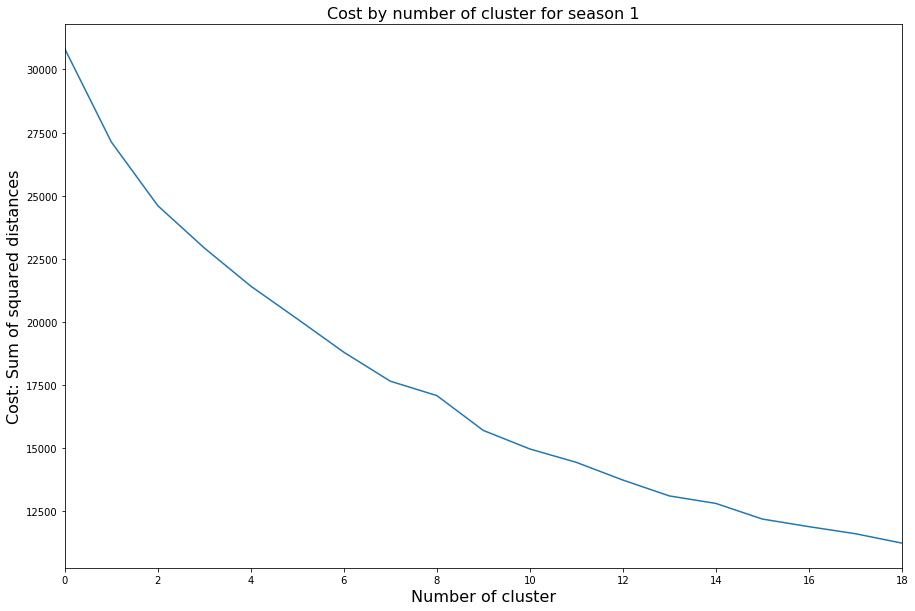

In [264]:
fig = plt.figure(figsize = (15,10))

sns.tsplot(interia)
plt.xlabel('Number of cluster', size = 16)
plt.ylabel('Cost: Sum of squared distances', size = 16)
plt.title('Cost by number of cluster for season 1', size = 16)
plt.savefig('cost_nb_cluster.png')
plt.show()

We decide to keep 8 cluster 

In [265]:
for el in Data_by_Seasons.keys():
    if(el < 8): 
        kmeans_model = KMeans(n_clusters=5, random_state=1).fit(Data_by_Seasons[el].iloc[:, :])
        Index_by_Seasons[el] = pd.DataFrame(data = kmeans_model.labels_,index = Index_by_Seasons[el])

In [266]:
dfs = [Index_by_Seasons[el] for el in range(0, 8)]

In [267]:
df_Labels = reduce(lambda left,right: pd.merge(left,right,how = 'outer',left_index=True, right_index=True), dfs)

In [268]:
df_Labels.columns = ['Season_1', 'Season_2', 'Season_3', 'Season_4', 'Season_5', 'Season_6', 'Season_7', 'Season_8']

We now have a dataframe with player_ID as index and cluster label as feature, the problem here is that we dont know witch cluster correspond to each group and also for each season cluster label is assign randomly. Fist  we will try to maximise the number of player with the same cluster over season

In [269]:
df_Labels.head()

,Season_1,Season_2,Season_3,Season_4,Season_5,Season_6,Season_7,Season_8
Player_ID,,,,,,,,
44,0,2.0,4.0,3.0,NaN,NaN,NaN,NaN
89,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
202,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN
234,0,0.0,4.0,3.0,3.0,0.0,4.0,1.0
272,2,2.0,0.0,2.0,4.0,2.0,1.0,0.0


Let say that we keep the label name for the first season, now we will try step by step to maximize the number of player with the same cluster label. 
In order to do this we will try each combination of label and find where we have the best number of match

In [270]:
df_Labels['TMP'] = np.nan

In [271]:
s = set(itertools.permutations(np.unique(df_Labels.Season_1)))


In [272]:
len(s)

120

In [273]:
for i in range(2, 9):
    s = set(itertools.permutations(np.unique(df_Labels.Season_1)))
    Counter = 0
    best_cluster = []
    for e in s:
        #print(e)
        df_Labels['Season_{}'.format(i)].replace(to_replace=[0, 1, 2, 3, 4], value = e, inplace = True)
        counter = 0
        df_Labels['TMP'] =  df_Labels['Season_{}'.format(i-1)] - df_Labels['Season_{}'.format(i)]
        counter = len(df_Labels[df_Labels['TMP'] == 0])
        if(counter > Counter):
            Counter = counter
            best_cluster = e
        df_Labels['Season_{}'.format(i)].replace(to_replace=[0, 1, 2, 3, 4], value = best_cluster, inplace = True)

In [274]:
df_Labels.drop('TMP', axis = 1, inplace = True)

In [275]:
df_Labels.head()

,Season_1,Season_2,Season_3,Season_4,Season_5,Season_6,Season_7,Season_8
Player_ID,,,,,,,,
44,0,2.0,3.0,3.0,NaN,NaN,NaN,NaN
89,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
202,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN
234,0,3.0,3.0,3.0,1.0,1.0,4.0,4.0
272,2,2.0,2.0,4.0,4.0,2.0,3.0,1.0


In [276]:
ID_Name = dict(zip(df_final.Player_ID, df_final.Player_Name))

In [277]:
def get_name(id_):
    return ID_Name[id_]

In [278]:
df_Labels['Player_Name'] = df_Labels.index.map(get_name)

In [279]:
for el in ['Season_1','Season_2', 	'Season_3', 	'Season_4', 	'Season_5', 	'Season_6', 	'Season_7', 	'Season_8'	]:
    df_Labels[el] = pd.to_numeric(df_Labels[el], errors = 'coerce', downcast= 'float')

In [280]:
df_Labels[20:40]

,Season_1,Season_2,Season_3,Season_4,Season_5,Season_6,Season_7,Season_8,Player_Name
Player_ID,,,,,,,,,
1703,0.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0,Carlos Boozer
1704,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Curtis Borchardt
1705,2.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,Caron Butler
1706,4.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,Dan Dickau
1707,2.0,2.0,2.0,4.0,4.0,3.0,3.0,NaN,Juan Dixon
1708,2.0,2.0,2.0,4.0,4.0,3.0,3.0,1.0,Mike Dunleavy
1709,0.0,3.0,3.0,3.0,1.0,1.0,0.0,4.0,Melvin Ely
1710,0.0,3.0,3.0,3.0,1.0,1.0,0.0,4.0,Dan Gadzuric
1711,0.0,0.0,3.0,3.0,3.0,1.0,2.0,4.0,Drew Gooden


## --------- Visualisation PCA ---------------

In [281]:
def plot_pca(stats, in1, in2, index):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)

    ax.set_title('2 component PCA', fontsize = 20)



    targets = ['Under the Mean', 'Over the Mean']

    for target in targets:
        if(target == 'Under the Mean'):
            indicesToKeep = features[stats] <= features[stats].mean()
        else: 
            indicesToKeep = features[stats] > features[stats].mean()
            #indicesToKeep = features['PTS_0'] > np.percentile(features['PTS_0'], 75) 
        ax.scatter(Data_by_Seasons[index].loc[indicesToKeep, in1]
                   , Data_by_Seasons[index].loc[indicesToKeep, in2]

                   , s = 50, alpha = 0.5)
    ax.legend(targets)
    ax.grid()
    plt.title('Points for the season 3')
    plt.savefig('pts3.png')
    plt.show()

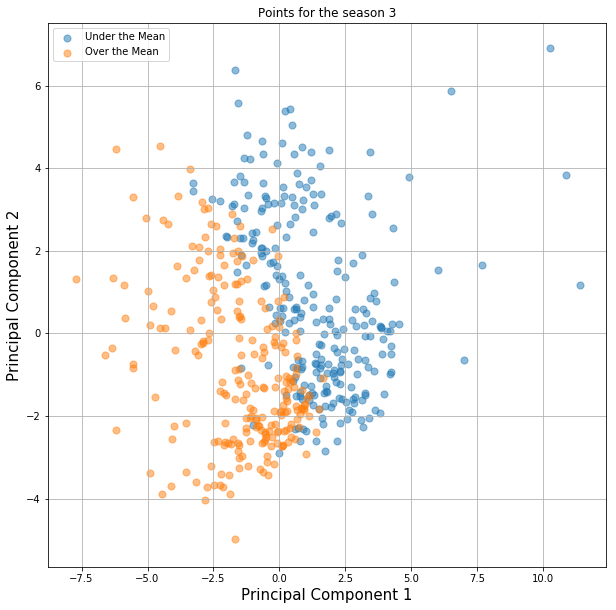

In [282]:
plot_pca('PTS_3', 0, 1, 3)

## -------- Supervised Learning --------------


In [283]:
df = pd.read_csv('all_3.csv')
df.drop(['Unnamed: 0', 'Player_ID', 'Player_Name', 'Experience', 'Exp'], axis = 1, inplace = True)

In [284]:
df.dropna(inplace = True)

In [285]:
df.head()

,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,OFF,DEF,2PM,...,TO,STL,PF,BLK,FLAG,TECH,EJECT,DBLDBL,TRIDBL,Position
0,0.469554,0.170747,0.408,0.170747,0.371,0.170747,0.783,0.010044,0.116761,0.099184,...,0.040804,0.023854,0.082863,0.006905,0.000000,0.000628,0.0,0.000000,0.0,SG
1,0.336227,0.129440,0.534,0.129440,0.000,0.129440,0.778,0.110497,0.213102,0.129440,...,0.068666,0.046567,0.131018,0.026046,0.002368,0.002368,0.0,0.003157,0.0,C
2,0.416503,0.143622,0.394,0.143622,0.275,0.143622,0.863,0.025460,0.114245,0.109022,...,0.048962,0.024155,0.067241,0.008487,0.000000,0.000653,0.0,0.000653,0.0,SF
3,0.339506,0.117071,0.400,0.117071,0.341,0.117071,0.761,0.033525,0.112814,0.059068,...,0.028736,0.042571,0.076096,0.014368,0.001064,0.001064,0.0,0.001064,0.0,SF
4,0.464912,0.165936,0.449,0.165936,0.324,0.165936,0.792,0.019006,0.104532,0.125000,...,0.051170,0.038012,0.092836,0.010234,0.000000,0.000731,0.0,0.000000,0.0,SF


### Compute metrics

In [286]:
df

,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,OFF,DEF,2PM,...,TO,STL,PF,BLK,FLAG,TECH,EJECT,DBLDBL,TRIDBL,Position
0,0.469554,0.170747,0.408,0.170747,0.371,0.170747,0.783,0.010044,0.116761,0.099184,...,0.040804,0.023854,0.082863,0.006905,0.000000,0.000628,0.000000,0.000000,0.000000,SG
1,0.336227,0.129440,0.534,0.129440,0.000,0.129440,0.778,0.110497,0.213102,0.129440,...,0.068666,0.046567,0.131018,0.026046,0.002368,0.002368,0.000000,0.003157,0.000000,C
2,0.416503,0.143622,0.394,0.143622,0.275,0.143622,0.863,0.025460,0.114245,0.109022,...,0.048962,0.024155,0.067241,0.008487,0.000000,0.000653,0.000000,0.000653,0.000000,SF
3,0.339506,0.117071,0.400,0.117071,0.341,0.117071,0.761,0.033525,0.112814,0.059068,...,0.028736,0.042571,0.076096,0.014368,0.001064,0.001064,0.000000,0.001064,0.000000,SF
4,0.464912,0.165936,0.449,0.165936,0.324,0.165936,0.792,0.019006,0.104532,0.125000,...,0.051170,0.038012,0.092836,0.010234,0.000000,0.000731,0.000000,0.000000,0.000000,SF
5,0.315315,0.123624,0.443,0.123624,0.319,0.123624,0.727,0.009510,0.092593,0.102102,...,0.067568,0.039039,0.074575,0.013514,0.000000,0.000501,0.000000,0.000000,0.000000,SG
6,0.270131,0.112340,0.600,0.112340,0.000,0.112340,0.498,0.122631,0.183946,0.112340,...,0.027442,0.016722,0.075465,0.036017,0.000000,0.001286,0.000000,0.008147,0.000000,C
7,0.383537,0.142073,0.433,0.142073,0.355,0.142073,0.825,0.016463,0.120732,0.082927,...,0.040244,0.039634,0.066463,0.018902,0.000000,0.000000,0.000000,0.000000,0.000000,SG
8,0.796292,0.254001,0.466,0.254001,0.367,0.254001,0.783,0.077470,0.231140,0.208280,...,0.148590,0.034290,0.142240,0.096520,0.000000,0.002540,0.000000,0.011430,0.000000,C
9,0.400885,0.126904,0.377,0.126904,0.347,0.126904,0.814,0.009762,0.066380,0.065079,...,0.058571,0.020174,0.065730,0.000651,0.000651,0.000651,0.000000,0.000000,0.000000,PG


In [296]:
Mean_Stat_Post = df.groupby('Position').agg('mean')[['PTS', 'AST', 'BLK']]

In [298]:
Mean_Stat_Post

,PTS,AST,BLK
Position,,,
C,0.339348,0.041773,0.042813
F,0.296809,0.043874,0.019542
G,0.272906,0.115837,0.008168
GF,0.311369,0.087494,0.004189
PF,0.352145,0.047821,0.027277
PG,0.367619,0.156164,0.006028
SF,0.359628,0.060169,0.017031
SG,0.384697,0.077705,0.009665


In [304]:
a = list(Mean_Stat_Post.index)

In [ ]:
sns.

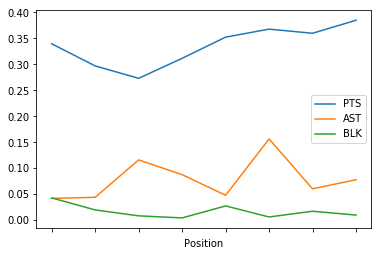

In [375]:
fig = plt.figure(figsize = (15,10))

Mean_Stat_Post.plot(x = Mean_Stat_Post.index)
plt.show()

In [153]:
MS = Mean_Stat_Post.agg('mean')

In [154]:
df = pd.read_csv('all_3.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [155]:
def target(r):
    target = (r['PTS'] - MS.PTS)/(MS.PTS) 
    + r['FG%']*(r['FGM-FGA'] - MS['FGM-FGA'])/(MS['FGM-FGA'] + MS['FG%'])
    + r['3P%']*(r['3PM-3PA'] - MS['3PM-3PA'])/(MS['3PM-3PA'] + MS['3P%'])
    + r['FT%']*(r['FTM-FTA'] - MS['FTM-FTA'])/(MS['FTM-FTA'] + MS['FT%'])
    + r['2P%']*(r['2PM'] - MS['2PM'])/( MS['2PM'] + MS['2P%'])
    + (MS['PTS']-MS['OFF'])*10 * (r['OFF'] - MS['OFF'])/MS['OFF']
    + (MS['PTS']-MS['DEF'])*10 * (r['DEF'] - MS['DEF'])/MS['DEF']
    + (r['PPS'] - MS.PPS)/MS.PPS
    + (MS['PTS']-MS['AST'])*10 * (r['AST'] - MS['AST'])/MS['AST']
    + (MS['PTS']-MS['STL'])*10 * (r['STL'] - MS['STL'])/MS['STL']
    + (MS['PTS']-MS['BLK'])*10 * (r['BLK'] - MS['BLK'])/MS['BLK']
    - (r['PF'] - MS['PF'])/MS['PF']
    - (r['FLAG'] - MS['FLAG'])/MS['FLAG']
    - (r['TECH'] - MS['TECH'])/MS['TECH']
    - (r['EJECT'] - MS['EJECT'])/MS['EJECT']
    r['Score'] = target 
    return r

In [156]:
df = df.apply(lambda x: target(x), axis = 1)

In [157]:
df.to_csv('mb.csv')

### Apply Model

In [158]:
test = to_exp(df)
test = pd.get_dummies(test, columns=['Position_0'])

In [159]:
test = test.replace([np.inf, -np.inf], np.nan)

In [160]:
test.head()

,Player_Name_0,PTS_0,FGM-FGA_0,FG%_0,3PM-3PA_0,3P%_0,FTM-FTA_0,FT%_0,OFF_0,DEF_0,...,TRIDBL_14,Score_14,Position_0_C,Position_0_F,Position_0_G,Position_0_GF,Position_0_PF,Position_0_PG,Position_0_SF,Position_0_SG
Player_ID,,,,,,,,,,,,,,,,,,,,,
3059318,Joel Embiid,0.796292,0.254001,0.466,0.254001,0.367,0.254001,0.783,0.077470,0.231140,...,NaN,NaN,1,0,0,0,0,0,0,0
2999409,Willy Hernangomez,0.443086,0.185688,0.529,0.185688,0.267,0.185688,0.728,0.128321,0.250604,...,NaN,NaN,1,0,0,0,0,0,0,0
2566769,Malcolm Brogdon,0.387374,0.146465,0.457,0.146465,0.404,0.146465,0.865,0.023737,0.083838,...,NaN,NaN,0,0,0,0,0,1,0,0
3907487,Marquese Chriss,0.431123,0.162602,0.449,0.162602,0.321,0.162602,0.624,0.054964,0.144280,...,NaN,NaN,0,0,0,0,1,0,0,0
3913176,Brandon Ingram,0.325246,0.121308,0.402,0.121308,0.294,0.121308,0.621,0.026371,0.112518,...,NaN,NaN,0,0,0,0,0,0,1,0


In [161]:
test.drop(['Exp_0', 'Player_Name_0'], axis = 1, inplace = True)

In [162]:
def model(N0, N1, df, acc, acc2): 
    fit_0 = df[df.Experience_0 == N0+1]
    train_1 = df[df.Experience_0 == N1+1]
    Y = train_1[['Score_{}'.format(N1)]]
    Season = ['Season_{}'.format(i) for i in range(0, N0 + 1)]
    features = []
    features = [Features_by_Seasons[el] for el in Season]
    features = np.concatenate(features, axis = 0)
    fit_0 = fit_0[features]
    train_1 = train_1[fit_0.columns]
    
    
    train_1.fillna(0, inplace = True)
    fit_0.fillna(0, inplace = True)
    
    fit_0 = StandardScaler().fit_transform(fit_0)
    train_1 = StandardScaler().fit_transform(train_1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(train_1, Y, test_size= 0.2)

    lm = linear_model.Lasso(normalize = False)
    model = lm.fit(X_train, y_train)

    acc.append(mean_squared_error(model.predict(X_test), y_test))
    acc2.append(mean_squared_error(model.predict(X_train), y_train))
    #print('mean squared error train {}'.format(mean_squared_error(model.predict(X_train), y_train)))
    #print('mean squared error test {}'.format(mean_squared_error(model.predict(X_test), y_test)))

    
    return pd.DataFrame(data = model.predict(fit_0), index = df[df.Experience_0 == N0+1].index)

In [193]:
df = pd.DataFrame()
acc = []
acc2 = []
for i in range(3, 9): 
    df = pd.concat([df, model_RFR(2, i, test, acc, acc2)], axis = 1)

In [195]:
df['Player_Name'] = df.index.map(get_name)

In [202]:
def get_S(id_): 
    return test[test.index == id_]['Score_2'].values[0]

In [203]:
df['Score_2'] = df.index.map(get_S)

In [204]:
df.head()

,0,0,0,0,0,0,Player_Name,Score_0,Score_1,Score_2
Player_ID,,,,,,,,,,
2581177,0.004789,-0.309615,-0.003701,-0.137189,0.168921,-0.178491,Rodney Hood,0.346046,0.399293,NaN
2583639,0.403256,0.338055,0.477590,0.045680,0.074347,0.466275,Elfrid Payton,-0.126118,0.080270,0.292985
2528426,0.226106,0.473284,0.277279,0.184028,0.341687,0.419612,Jordan Clarkson,0.420320,0.430637,0.499731
3593,0.149141,0.475365,0.527426,-0.393701,0.259970,0.310702,Bojan Bogdanovic,0.123698,0.248489,0.593309
3102530,0.312696,0.209063,0.226054,0.083490,0.138160,0.245472,Jusuf Nurkic,0.150326,0.432295,0.418253


In [206]:
df.columns = ['Score_3','Score_4', 'Score_5','Score_6','Score_7','Score_8', 'Player_Name', 'Score_0', 'Score_1', 'Score_2' ]

In [207]:
df.head()

,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,Player_Name,Score_0,Score_1,Score_2
Player_ID,,,,,,,,,,
2581177,0.004789,-0.309615,-0.003701,-0.137189,0.168921,-0.178491,Rodney Hood,0.346046,0.399293,NaN
2583639,0.403256,0.338055,0.477590,0.045680,0.074347,0.466275,Elfrid Payton,-0.126118,0.080270,0.292985
2528426,0.226106,0.473284,0.277279,0.184028,0.341687,0.419612,Jordan Clarkson,0.420320,0.430637,0.499731
3593,0.149141,0.475365,0.527426,-0.393701,0.259970,0.310702,Bojan Bogdanovic,0.123698,0.248489,0.593309
3102530,0.312696,0.209063,0.226054,0.083490,0.138160,0.245472,Jusuf Nurkic,0.150326,0.432295,0.418253


In [208]:
df.to_csv('Prediction.csv')

In [320]:
test = pd.read_csv('Prediction.csv')

In [323]:
test = test[['Player_Name', 'Score_0', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_8']]

In [335]:
tmp = test[0:2]

In [338]:
tmp

,Player_Name,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8
0,Rodney Hood,0.346046,0.399293,NaN,0.004789,-0.309615,-0.003701,-0.137189,0.168921,-0.178491
1,Elfrid Payton,-0.126118,0.080270,0.292985,0.403256,0.338055,0.477590,0.045680,0.074347,0.466275


In [364]:
arr = [0.346046,	0.399293,0.004789, 	-0.309615,	-0.003701, 	-0.137189, 	0.168921, 	-0.178491]
y1 = [1, 2, 3, 4, 5, 6, 7, 8]

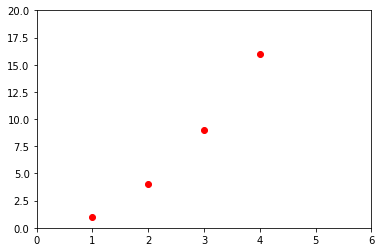

In [372]:
plt.plot(y1, [1,4,9,16, 23, 43, 43, 43], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

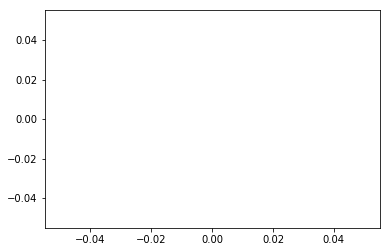

In [365]:
plt.plot(y= arr, x = y1)
plt.show()

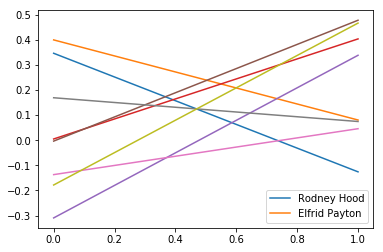

In [337]:
tmp.plot()
plt.legend(tmp.Player_Name)
plt.show()

In [334]:
sns.tsplot(tmp)

ValueError: cannot label index with a null key

Here you can find the second model that we don't use a the end'

In [168]:
def model_RFR(N0, N1, df, acc1, acc2): 
	fit_0 = df[df.Experience_0 == N0+1]
	train_1 = df[df.Experience_0 == N1+1]
	Y = train_1[['Score_{}'.format(N1)]]
	Season = ['Season_{}'.format(i) for i in range(0, N0 + 1)]
	features = []
	features = [Features_by_Seasons[el] for el in Season]
	features = np.concatenate(features, axis = 0)
	fit_0 = fit_0[features]
	train_1 = train_1[fit_0.columns]
	
	X_train, X_test, y_train, y_test = train_test_split(train_1, Y, test_size= 0.2)
	
	
	X_train.fillna(0, inplace = True)
	y_train.fillna(0, inplace = True)
	fit_0.fillna(0, inplace = True)

	for el in X_train: 
		X_train[el] = X_train[el].astype('float64')
	
	param_grid = {
				 'n_estimators': [5, 10, 15, 20, 40],
				 'max_depth': [2, 10, 20, 50]
	}
	
	RFR = RandomForestRegressor()
	
	grid_RFR = GridSearchCV(RFR, param_grid, cv=10)
	
	
	grid_RFR.fit(X_train, y_train)
	
	#print('mean squared error train {}'.format(mean_squared_error(grid_RFR.predict(X_train), y_train)))
	acc1.append(mean_squared_error(grid_RFR.predict(X_train), y_train))
	acc2.append(mean_squared_error(grid_RFR.predict(X_test), y_test))
	#print('mean squared error test {}'.format(mean_squared_error(grid_RFR.predict(X_test), y_test)))

	
	return pd.DataFrame(data = grid_RFR.predict(fit_0), index = fit_0.index)